# Model Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
ames = pd.read_csv('../datasets/ames_v1.csv', keep_default_na=False)
ames1 = pd.read_csv('../datasets/amesv2.csv')

## Initial OLS Model

In [3]:
X = ames1
y = np.log(ames['saleprice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=77)

In [4]:
lr = LinearRegression()
lr.fit(X_train,y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
print(cross_val_score(lr, X, y, cv=5).mean())
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8461452541116159
0.9206428930274038
0.8621985777386981


In [5]:
train_mse = mean_squared_error(y_true=y_train,y_pred=train_pred)
train_rmse = mean_squared_error(y_true=y_train,y_pred=train_pred, squared = False)
train_rmse_e = mean_squared_error(y_true=np.exp(y_train),y_pred=np.exp(train_pred), squared = False)

test_mse = mean_squared_error(y_true=y_test,y_pred=test_pred)
test_rmse = mean_squared_error(y_true=y_test,y_pred=test_pred, squared = False)
test_rmse_e = mean_squared_error(y_true=np.exp(y_test),y_pred=np.exp(test_pred), squared = False)

print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train RMSE exp: {train_rmse_e}')
print()
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test RMSE exp: {test_rmse_e}')

Train MSE: 0.012128184374282612
Train RMSE: 0.11012803627724692
Train RMSE exp: 19867.57883620927

Test MSE: 0.021809584590528973
Test RMSE: 0.1476806845546464
Test RMSE exp: 26369.70283862772


In [6]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [7]:
lr_sc = LinearRegression()
lr_sc.fit(Z_train,y_train)

LinearRegression()

In [8]:
print(f'Baseline R2 score: {cross_val_score(lr_sc,X,y).mean()}')
print(f'Train R2 Score: {lr_sc.score(Z_train,y_train)}')
print(f'Testing R2 Score: {lr_sc.score(Z_test,y_test)}')

Baseline R2 score: 0.8461452541116159
Train R2 Score: 0.9206428930278018
Testing R2 Score: 0.8621985776497884


## Ridge Regression  

Using the Ridge Regression, our train R2 score became 91.6% and the test score became 87.9%. There was a better bias-variance trade off compared to the original OLS model.

In [9]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(Z_train, y_train)

print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.916635693043739
0.878658536424019


In [10]:
ridge_alphas = np.logspace(-4,0,1000)

ridge_cv = RidgeCV(alphas = ridge_alphas, scoring='r2', cv=5)

ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.00926219e-04, 1.01861017e-04, 1.02804473e-04,
       1.03756668e-04, 1.04717682e-04, 1.05687597e-04, 1.06666496e-04,
       1.07654461e-04, 1.08651577e-04, 1.09657929e-04, 1.10673602e-04,
       1.11698682e-04, 1.12733256e-04, 1.13777413e-04, 1.14831241e-04,
       1.15894830e-04, 1.16968270e-04, 1.18051653e-04, 1.19145070e-04,
       1.20248614e-04, 1.21362380e-0...
       8.08924349e-01, 8.16416760e-01, 8.23978568e-01, 8.31610415e-01,
       8.39312950e-01, 8.47086827e-01, 8.54932707e-01, 8.62851257e-01,
       8.70843150e-01, 8.78909065e-01, 8.87049689e-01, 8.95265713e-01,
       9.03557835e-01, 9.11926760e-01, 9.20373200e-01, 9.28897872e-01,
       9.37501502e-01, 9.46184819e-01, 9.54948564e-01, 9.63793480e-01,
       9.72720319e-01, 9.81729841e-01, 9.90822810e-01, 1.00000000e+00]),
        cv=5, scoring='r2')

In [11]:
r_train_pred = ridge_cv.predict(Z_train)
r_test_pred = ridge_cv.predict(Z_test)

# Calculating metrics for the scaled train data
r_alpha = ridge_cv.alpha_


#ridge train metrics
r_train_score = ridge_cv.score(Z_train, y_train)
mse_train = metrics.mean_squared_error(y_train, r_train_pred)
rmse_train = metrics.mean_squared_error(y_train, r_train_pred, squared=False)
exp_train_rmse = metrics.mean_squared_error(np.exp(y_train), np.exp(r_train_pred), squared=False)
#ridge test metrics
r_test_score = ridge_cv.score(Z_test, y_test)
mse_test = metrics.mean_squared_error(y_test, r_test_pred)
rmse_test = metrics.mean_squared_error(y_test, r_test_pred, squared=False)
exp_test_rmse = metrics.mean_squared_error(np.exp(y_test), np.exp(r_test_pred), squared=False)


print(f'Ridge Alpha: {r_alpha}')
print(f'Ridge Train R2: {r_train_score}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train exp RMSE: {exp_train_rmse}')
print()
print(f'Test RMSE: {rmse_test}')
print(f'Ridge Test R2: {r_test_score}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test exp RMSE: {exp_test_rmse}')

Ridge Alpha: 1.0
Ridge Train R2: 0.9193258189438992
Train MSE: 0.012329473432423903
Train RMSE: 0.1110381620544212
Train exp RMSE: 19866.72346755808

Test RMSE: 0.1417285830453398
Ridge Test R2: 0.8730825911886718
Test MSE: 0.02008699125203978
Test RMSE: 0.1417285830453398
Test exp RMSE: 25848.846413151197


**The Ridge regression holds the normality (of residuals) assumpion**

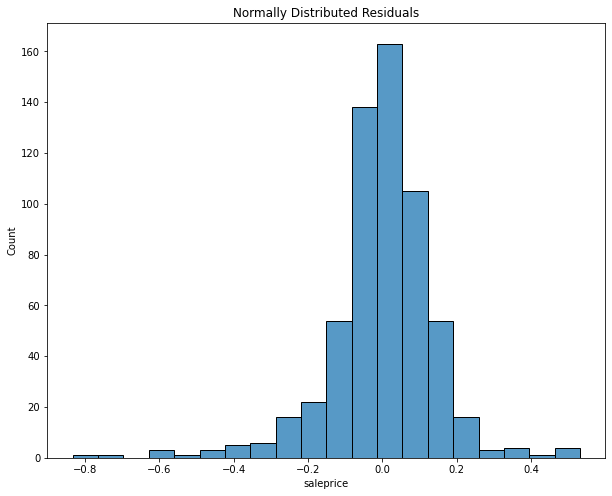

In [12]:
plt.figure(figsize=(10,8))
ridge_resids = y_test - ridge_cv.predict(Z_test)
sns.histplot(ridge_resids, bins=20)
plt.title('Normally Distributed Residuals');

**Ridge Regression: Homoscedasticity of Errors**

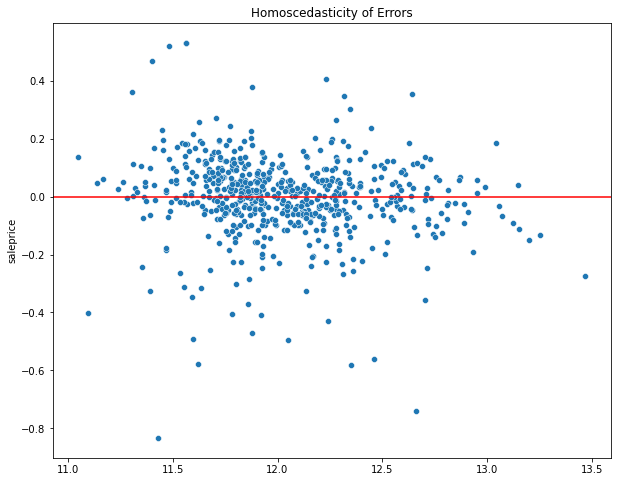

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=ridge_cv.predict(Z_test), y=ridge_resids)
plt.axhline(0, color='red')
plt.title('Homoscedasticity of Errors');

### Lasso Regression

In [14]:
lasso_alphas = np.logspace(-3,0,2000)
    
lasso_cv = LassoCV(alphas = lasso_alphas, cv=5)
    
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00100346, 0.00100694, ..., 0.99311262, 0.99655036,
       1.        ]),
        cv=5)

In [15]:
l_train_preds = lasso_cv.predict(Z_train)
l_test_preds = lasso_cv.predict(Z_test)

l_alpha = lasso_cv.alpha_
l_train_score = lasso_cv.score(Z_train, y_train)
l_test_score = lasso_cv.score(Z_test, y_test)

mse_train = metrics.mean_squared_error(y_train, l_train_preds)
mse_test = metrics.mean_squared_error(y_test, l_test_preds)

rmse_train = metrics.mean_squared_error(y_train, l_train_preds, squared=False)
exp_rmse_trn = metrics.mean_squared_error(np.exp(y_train), np.exp(l_train_preds), squared=False)
rmse_test = metrics.mean_squared_error(y_test, l_test_preds, squared=False)
exp_rmse_tst = metrics.mean_squared_error(np.exp(y_test), np.exp(l_test_preds), squared=False)

print(f'Lasso Alpha: {l_alpha}')
print(f'Lasso Train R2: {l_train_score}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train Exp RMSE: {exp_rmse_trn}')
print()
print(f'Lasso RMSE: {rmse_train}')
print(f'Lasso Test R2: {r_test_score}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test Exp RMSE: {exp_rmse_tst}')

Lasso Alpha: 0.001
Lasso Train R2: 0.9084437209607186
Train MSE: 0.013992589639074422
Train RMSE: 0.11829027702678872
Train Exp RMSE: 21159.382039657663

Lasso RMSE: 0.11829027702678872
Lasso Test R2: 0.8730825911886718
Test MSE: 0.019051412716267608
Test RMSE: 0.13802685505461468
Test Exp RMSE: 25373.51122455786


**The LASSO regression model shows the normality of residuals**

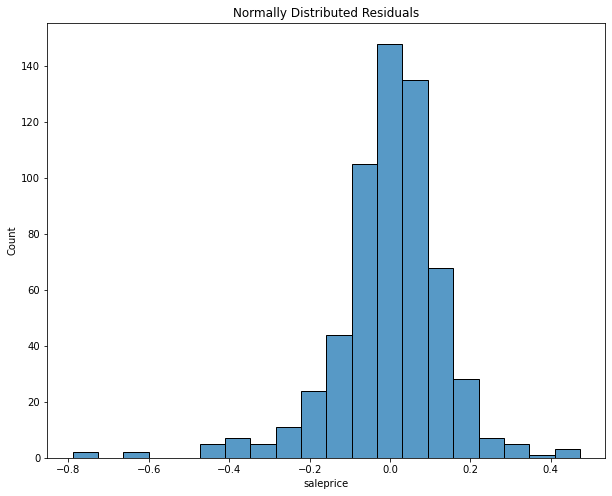

In [16]:
plt.figure(figsize=(10,8))
resids = y_test - lasso_cv.predict(Z_test)
sns.histplot(resids, bins=20)
plt.title('Normally Distributed Residuals');

**The scatterplot below shows the equal variances (of residuals)**

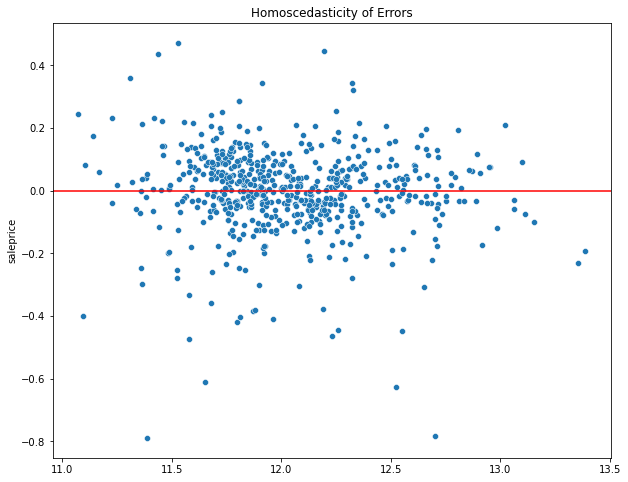

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=lasso_cv.predict(Z_test), y=resids)
plt.axhline(0, color='red')
plt.title('Homoscedasticity of Errors');

The coefficients listed below signify the change in the log saleprice with one unit change for the predictor variable with every variable held constant. 

In [18]:
lasso_cv.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.55282013e-02,  0.00000000e+00,
       -0.00000000e+00, -6.57423674e-03,  9.30773529e-03, -5.95382867e-03,
        3.89557926e-02,  1.33940794e-01,  0.00000000e+00,  5.33877552e-03,
       -0.00000000e+00,  2.10828085e-02,  1.22032553e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.20502042e-02,
        0.00000000e+00, -4.19371213e-02,  0.00000000e+00, -0.00000000e+00,
        2.38051575e-03,  1.32612947e-02,  0.00000000e+00, -7.29544184e-03,
        0.00000000e+00,  0.00000000e+00, -6.73813812e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.35159571e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.67578221e-02,  0.00000000e+00,  1.49898980e-03,
       -1.23069495e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  9.82397107e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [19]:
#learned this function from Ani during the hackathon

variable, coef = (X.columns, np.round(lasso_cv.coef_, 3))
lasso_coef = pd.DataFrame(data = {"variable": variable, "coef": coef})
lasso_coef = lasso_coef[lasso_coef['coef'] !=0]
lasso_coef.sort_values(by = "coef", ascending = False)
lasso_coef = lasso_coef.sort_values(by = "coef", ascending = False)
lasso_coef
lasso_coef.to_csv('../datasets/coef.csv', index=False)

In [20]:
#this are the optimized features after the lasso regression
features = lasso_coef[['variable']]
features

,variable
9,total_sf
92,garage_cars total_bath
8,total_bath
211,paved_drive_Y
77,bedroom_abvgr has_2fl
...,...
164,neighborhood_OldTown
21,ms_subclass garage_cars
204,kitchen_qual_Gd
198,exter_qual_TA


# Conclusion and Recommendations

The best model to predict home sale prices in Ames, Iowa was the Ridge model. This model had the best bias-variance tradeoff with a mean train RMSE of 19866 and a mean test RMSE of 25848. The R2 scores show that our variance in our predictions can be explained by 90% in our train dataset and 87% in our test dataset.  

The Pearson correlation matrix was utilized to filter dependence among the numerical predictor variables. High coefficients within variables in the Pearson correlation analysis were removed. The distribution of the target variable (Sale Price of Homes) were not normally distributed. A log transformation of the target variable had to be conducted in order to have a normal distribution of our target variable. After creating an initial model, the Ridge and LASSO regularization methods were utilized to provide a better bias-variance trade off.

The model will be useful for real estate agents and home sellers/buyers as they evaluate their home values against other homes in Ames, Iowa. The model does better than the baseline model of seeing the average home prices. The baseline model had approximately 80000 in mean error compared to the LASSO model which had a mean error of 23000 in sale price prediction.

**Recommendations**  

Even with the Ridge model, there is still evidence that the model is overfit. In order to move this project forward, one can reduce complexity by reducing the number of categorical features that were selected in the model. A Spearman correlation analysis can be used to reduce the complexity in the model. The coefficients of the predictor variables could have been analyzed in the initial OLS model to take out any variables that didn't have a strong correlation in predicting the sale price.   

In [21]:
#Spearman correlation analysis: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

### Kaggle Submission: Read in Test Data

In [22]:
test = pd.read_csv('../datasets/test_clean.csv')

In [23]:
test_id = test['id'].to_frame()
test.drop(columns = 'id', inplace=True)

In [24]:
#have train columns match test columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
category = ['object']
df_num = test.select_dtypes(include=numerics)
df_cat = test.select_dtypes(include=category)
n_vars = df_num.columns
c_vars = df_cat.columns

In [25]:
#dummify test categories
test_d = pd.get_dummies(test[c_vars], columns = c_vars, drop_first=True)

In [26]:
#set polynomial features in test df
features = test[n_vars].columns
X = test[features]
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly.fit_transform(X)

In [27]:
X_poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(features))

In [28]:
#combine test category dummies and polynomial features
test1 = pd.concat([X_poly_df, test_d],axis=1)

Ensure train and test data sets match

In [29]:
missing_cols = set(test1.columns) - set(ames1.columns)
missing_cols

set()

In [30]:
missing_cols = set(ames1.columns) - set(test1.columns)
missing_cols

set()

In [31]:
test1.shape

(878, 212)

In [32]:
ames1.shape

(2000, 212)

In [33]:
#test set is now cleaned set model

X = ames1
y = np.log(ames['saleprice'])

lr=LinearRegression()
lr.fit(X,y)

train_pred = lr.predict(X)
train_pred.mean()

12.039194125213402

In [34]:
test_pred = lr.predict(test1)
np.log(test_pred.mean())

2.4865035216988325

In [36]:
X = ames1
y = np.log(ames['saleprice'])

sc = StandardScaler()
Z_train = sc.fit_transform(X)
Z_test = sc.transform(test1)

ridge_model = Ridge(alpha = 10)
ridge_model.fit(Z_train, y)

print(ridge_model.score(Z_train, y))

ridge_alphas = np.logspace(-4,0,1000)

ridge_cv = RidgeCV(alphas = ridge_alphas, scoring='r2', cv=5)

ridge_cv.fit(Z_train, y)

r_train_pred = ridge_cv.predict(Z_train)
r_test_pred = ridge_cv.predict(Z_test)

# Calculating metrics for the scaled train data
r_alpha = ridge_cv.alpha_

#ridge train metrics
r_train_score = ridge_cv.score(Z_train, y)
mse_train = metrics.mean_squared_error(y, r_train_pred)
rmse_train = metrics.mean_squared_error(y, r_train_pred, squared=False)
exp_train_rmse = metrics.mean_squared_error(np.exp(y), np.exp(r_train_pred), squared=False)

print(f'Ridge Alpha: {r_alpha}')
print(f'Ridge Train R2: {r_train_score}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train exp RMSE: {exp_train_rmse}')

0.9120244143911261
Ridge Alpha: 1.0
Ridge Train R2: 0.9135383607805322
Train MSE: 0.013361230010269
Train RMSE: 0.11559078687451262
Train exp RMSE: 20775.45133801725


In [37]:
model_pred_final = np.exp(ridge_cv.predict(Z_test))
model_pred_final.mean()

178907.79275331183

In [38]:
prediction = pd.DataFrame({'Id': test_id['id'], 'SalePrice': model_pred_final})
prediction['SalePrice'].mean()

178907.79275331195

In [39]:
prediction.head()

,Id,SalePrice
0,2658,111657.279340
1,2718,154981.547362
2,2414,184548.787407
3,1989,110752.382201
4,625,166988.174051


In [40]:
prediction.to_csv('../datasets/test_prediction2_pearsonridge.csv', index=False)